In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Datas/boston.csv')

### Exploring Data

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
data.shape

(506, 14)

In [5]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


### Handling Missing Values

In [8]:
data.isnull().values.any()

True

In [9]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
NaN_cols = data.columns[data.isnull().any()]

In [11]:
for i in NaN_cols:
    data[i].fillna(data[i].mean(), inplace=True)

In [12]:
data.isnull().sum().sum()

0

## Train Test Split

In [13]:
x = data.drop('MEDV', axis=1)
y = data['MEDV']

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

# Model Building

## 1. Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [17]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred_train = lr_model.predict(x_train)
y_pred_train

array([ 4.91960676, 28.29166688, 16.92926017, 29.66365002, 19.20846949,
       16.11364814, 18.20345695, 12.73011459,  9.44807541, 19.13810977,
       33.76794596, 32.87001104, 23.41108169, 20.02848421, 22.90313118,
       26.4760545 , 21.18402794, 17.75932365, 32.32392491, 10.52930577,
       19.13700353, 31.95056636, 18.96468755, 15.80801235, 18.9754202 ,
       15.06599975, 24.26029621, 23.18686629, 17.53522807, 13.89629053,
       20.41934897, 24.01696206, 17.57497761, 25.4986665 , 22.4990816 ,
       27.71322652, 36.94969941, 16.89675155, 12.5922186 , 34.9746024 ,
       31.41468422, 20.29571853, 39.95528305, 28.70453744, 28.38641618,
       17.77187987, 26.95989702, 40.69636406, 27.54360462, 17.31310293,
       37.51405745, 35.49317327, 14.2370953 , 27.74288972, 22.00632016,
       24.76385811, 21.24921515, 23.56086785, 27.98929039, 29.74610071,
       14.55959452, 25.8988581 , 22.88173178, 14.11721984, 14.0755255 ,
       25.72579347, 19.57025219, 30.48754821, 10.26033866, 24.48

In [19]:
y_pred = lr_model.predict(x_test)
y_pred

array([26.31812567, 22.79683143, 29.23125997, 11.49183765, 21.53268658,
       19.39474608, 20.29386219, 21.36107549, 19.40186815, 20.52956198,
        4.86056552, 16.73812114, 16.9864988 ,  5.19197768, 39.65749246,
       32.93591762, 21.94297235, 36.31903747, 31.75129894, 23.59201076,
       24.94683457, 23.53579064, 20.98657957, 30.62139449, 22.64451417,
        8.98366311, 17.48902883, 17.95985097, 36.10671343, 21.0619906 ,
       17.82227837, 17.41457064, 18.97315499, 23.1069634 , 28.97706411,
       19.62378019, 11.1975275 , 24.4689843 , 18.37701745, 15.46836265,
       26.2559486 , 21.41178222, 23.76140365, 14.79630202, 23.72475887,
       24.70721374, 19.6676127 , 23.36258703, 10.16371693, 24.64066927,
       22.38068556, 18.88647418, 24.45953959, 30.8951372 , 13.07048809,
       22.16165932, 21.10431701, 15.7260599 , 13.01007866, 22.81205055,
       17.76523078, 21.84679385, 32.53873152, 31.49326404, 17.56515261,
       33.27739347, 19.36752973, 19.33276875, 20.55083554, 24.00

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('Training Set :{:.2f}%'.format(r2_score(y_train,y_pred_train)*100))
print('Testing Set :{:.2f}%'.format(r2_score(y_test,y_pred)*100))

Training Set :75.82%
Testing Set :65.46%


In [21]:
print('MAE: {:.2f}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

MAE: 3.74
MSE: 28.76
RMSE: 5.36


### Finding Best value for degree

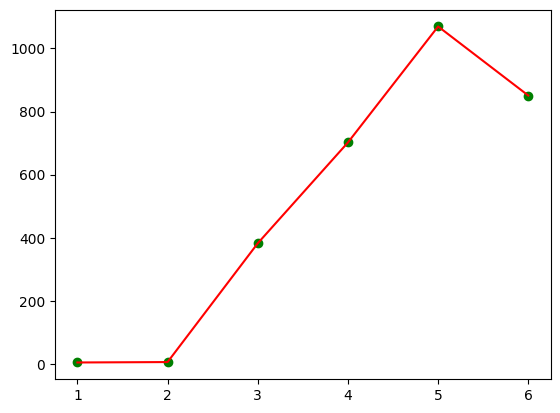

In [23]:
from sklearn.preprocessing import PolynomialFeatures

n_degree = [1,2,3,4,5,6]
plt_mean_square_error = []

for degree in n_degree:
    poly_model = PolynomialFeatures(degree=degree)
    
    poly_model.fit(x_train)
    poly_x_train = poly_model.transform(x_train)
    poly_x_test = poly_model.transform(x_test)
    
    lreg_model = LinearRegression()
    lreg_model.fit(poly_x_train, y_train)
    y_pred = lreg_model.predict(poly_x_test)
    
    plt_mean_square_error.append(mean_squared_error(y_test, y_pred, squared=False))
    
plt.scatter(n_degree, plt_mean_square_error, color='green')
plt.plot(n_degree, plt_mean_square_error, color='red')

## 2. Polynomial Regression (Degree=2)

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)

In [25]:
poly_reg.fit(x_train)

PolynomialFeatures()

In [26]:
x_train_ = poly_reg.transform(x_train)
x_test_ = poly_reg.transform(x_test)

In [27]:
x_train_.shape, x_test_.shape

((354, 105), (152, 105))

In [28]:
lr_model_ = LinearRegression()
lr_model_.fit(x_train_, y_train)

LinearRegression()

In [29]:
y_pred_train_ = lr_model_.predict(x_train_)
y_pred_train_

array([14.08229327, 28.44215488, 16.93839741, 25.73969054, 21.19969106,
       16.31229758, 17.20280981, 12.200037  ,  7.62311196, 17.36385965,
       32.9251132 , 33.26509023, 33.71217394, 21.62426114, 22.08742809,
       24.14507222, 22.08390307, 17.76124763, 29.03250551, 12.38541865,
       18.45066214, 27.74784184, 20.67695856, 10.38092065, 19.19410872,
       16.93888426, 22.57016826, 23.94207096, 14.85174394, 11.08006716,
       20.03887367, 23.00687218, 17.04231787, 25.76826096, 24.82523274,
       25.54558396, 46.10283422, 14.34358692,  9.53062415, 34.91035676,
       31.15813637, 17.50028968, 43.0355413 , 22.94654512, 24.2491231 ,
       18.47425938, 25.88371611, 45.12881875, 26.18430138, 17.03889322,
       40.20916104, 33.94049239, 19.37593889, 26.65535569, 21.72704196,
       25.10356617, 23.19376588, 19.06976461, 27.6581254 , 25.62089062,
       10.61391449, 21.99266791, 19.38297653,  9.56448507, 14.59797335,
       25.5984118 , 18.64426351, 34.06022692, 15.54160619, 18.61

In [30]:
y_pred_ = lr_model_.predict(x_test_)
y_pred_

array([ 22.67599368,  24.11843967,  23.94481945,  10.43538475,
        20.23110294,  20.69503951,  23.34332323,  20.67324924,
        17.99793291,  15.86463618,  10.82774496,  15.8280127 ,
        13.11604166,   8.6740334 ,  45.18858886,  33.13777733,
        24.57499409,  36.90273666,  31.41370678,  22.67747378,
        24.88091063,  22.22232604,  20.4187746 ,  29.2462976 ,
        19.52232242,  26.89700174,  16.4215982 ,  18.43229246,
        37.01749396,  16.02509403,  15.91324806,  17.30216742,
        19.30749321,  16.71741128,  26.04575276,  17.52685714,
         5.7269659 ,  38.8270061 ,  17.26061535,  14.12312317,
        21.27443957,  20.36669636,  18.84569526,  17.09819698,
        13.44127822,  23.62547803,  18.04241347, -13.78437424,
        10.53220153,  23.38988614, -35.7487483 ,  23.88251066,
        18.9745245 ,  46.42641759,  10.73185515,  18.94544339,
        17.41213846,  15.91165686,  28.70250154,  20.92951584,
        25.49278045,  21.24660826,  29.94436288,  28.22

In [31]:
print('Training Set :{:.2f}%'.format(r2_score(y_train,y_pred_train_)*100))
print('Testing Set :{:.2f}%'.format(r2_score(y_test,y_pred_)*100))

Training Set :92.71%
Testing Set :46.64%


Performing well on Training Data but not performing well on Testing Data (Overfitting).

In [32]:
print('MAE: {:.2f}'.format(mean_absolute_error(y_test,y_pred_)))
print('MSE: {:.2f}'.format(mean_squared_error(y_test,y_pred_)))
print('RMSE: {:.2f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_))))

MAE: 3.45
MSE: 44.43
RMSE: 6.67


## Conclution 

Linear Regression is more suiltable than Polynomial Regression